In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread,imshow,imsave

In [3]:
from numpy.fft import fft,ifft,fft2,ifft2,fftshift,ifftshift

def fourier2(im):
    return fftshift(fft2(im))

def ifourier2(f):
    return ifft2(ifftshift(f)).real

def fourier(s):
    return fftshift(fft(s))

def ifourier(f):
    return ifft(ifftshift(f)).real

def ampl(f):
    return np.sqrt(f.real**2 + f.imag**2)

def phase(f):
    return np.arctan2(f.imag, f.real)

<IPython.core.display.Javascript object>


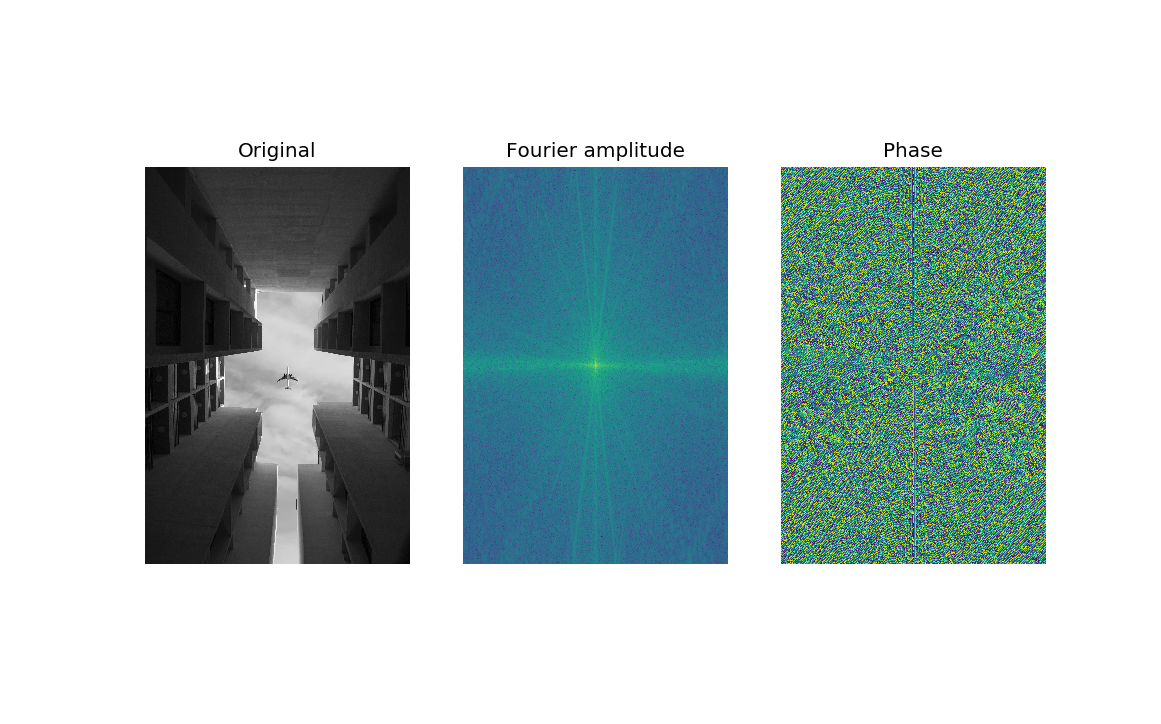

In [4]:
im = imread('airplane.jpg')

f = fourier2(im)
a = ampl(f)
p = phase(f)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=255, interpolation='none')
plt.title('Original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(np.log(ampl(f)), interpolation='none', cmap='viridis')
plt.title('Fourier amplitude')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(p, interpolation='none', cmap='viridis')
plt.title('Phase')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


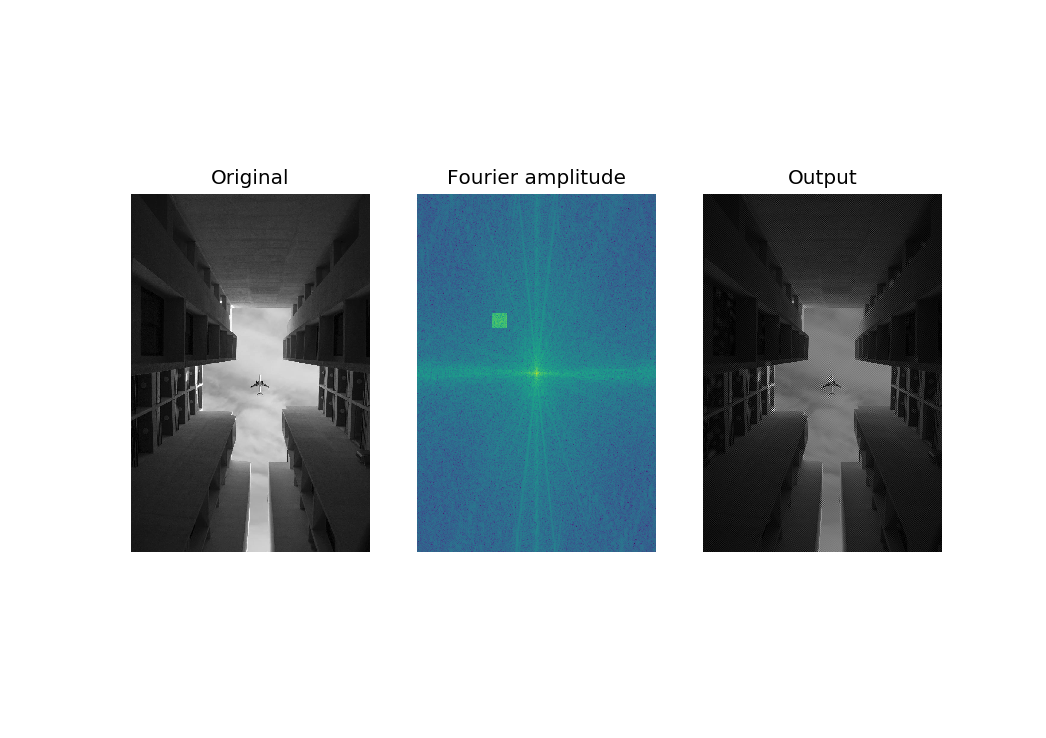

In [18]:
from skimage.morphology import disk
from skimage.filters import gaussian

# Fourier mask
dsize = 30
mask = np.ones(im.shape)
#mask[mask.shape[0]//2-dsize:mask.shape[0]//2+dsize+1,mask.shape[1]//2-dsize:mask.shape[1]//2+dsize+1] = 1-disk(dsize)
mask[400:450,250:300] *= 100
f2 = f*mask

r = ifourier2(f2)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=255, interpolation='none')
plt.title('Original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(np.log(ampl(f2)+1), interpolation='none', cmap='viridis')
plt.title('Fourier amplitude')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(np.abs(r), interpolation='none', cmap=plt.cm.gray)
plt.title('Output')
plt.axis('off')
plt.show()